## Imports

In [23]:
# Standard
import json
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Scale
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler

# Scoring
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


## Data

In [24]:
file_name = 'gb'
df = pd.read_pickle(f'..\\processed_data\\{file_name}.pki')

In [25]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,TotalIncome,EMI,BalanceIncome
0,LP001002,1,0,0,0,0,1.0,2,1,5849.0,0.347222,5848.652778
1,LP001003,1,1,1,0,0,1.0,0,0,6091.0,0.355556,6090.644444
2,LP001005,1,1,0,0,1,1.0,2,1,3000.0,0.183333,2999.816667
3,LP001006,1,1,0,1,0,1.0,2,1,4941.0,0.333333,4940.666667
4,LP001008,1,0,0,0,0,1.0,2,1,6000.0,0.391667,5999.608333


In [26]:
r = random.randint(1, 1001)
train, test = train_test_split(df, test_size=.25, random_state=r)

In [27]:
X = train.drop(['Loan_ID', 'Loan_Status'], axis = 1)
y = train['Loan_Status']
print(X.head())
print(y.head())

     Gender  Married Dependents  Education  Self_Employed  Credit_History  \
269       0        0          1          0              0             1.0   
299       1        1          1          0              0             1.0   
273       1        1          0          0              0             1.0   
314       1        1          0          0              0             1.0   
296       1        1          1          0              0             1.0   

     Property_Area  TotalIncome       EMI  BalanceIncome  
269              2       4436.0  0.250000    4435.750000  
299              2       4939.0  0.313889    4938.686111  
273              1       4843.0  0.416667    4842.583333  
314              0       4316.0  0.441667    4315.558333  
296              1       6875.0  0.555556    6874.444444  
269    1
299    0
273    1
314    0
296    1
Name: Loan_Status, dtype: int32


In [28]:
y.value_counts()

Loan_Status
1    311
0    126
Name: count, dtype: int64

## Scale Data

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

## Hyper-parameter Training SVM

In [111]:
model = SVC(class_weight='balanced', kernel='poly', degree = 12, C = .1, cache_size=10000)

In [112]:
model.fit(X, y)

In [36]:
# Find the Best Model
param_grid = {
    'kernel': ['poly'],
    'C': [_ * .1 for _ in range(1, 11, 10)],
    'degree' : [_ for _ in range(2, 8)]
}

grid_search = GridSearchCV(SVC(class_weight='balanced', cache_size=10000), param_grid=param_grid, cv=5,scoring='f1_weighted', verbose=100, n_jobs=-1)
grid_search.fit(X_train_scaled, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=SVC(cache_size=10000, class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [0.1], 'degree': [2, 3, 4, 5, 6, 7],
                         'kernel': ['poly']},
             scoring='f1_weighted', verbose=100)

In [37]:
grid_search.best_params_

{'C': 0.1, 'degree': 2, 'kernel': 'poly'}

In [38]:
model = grid_search.best_estimator_

## Scoring

In [39]:
X_test, y_test = test.drop(columns=['Loan_ID', 'Loan_Status']), test['Loan_Status']

### Scale Data

In [40]:
X_test_scaled = scaler.fit_transform(X_test)

In [41]:
y_pred = model.predict(X_test_scaled)

In [42]:
f1_score(y_pred = y_pred, y_true=y_test)

0.857142857142857

In [43]:
accuracy_score(y_pred = y_pred, y_true=y_test)

0.7945205479452054

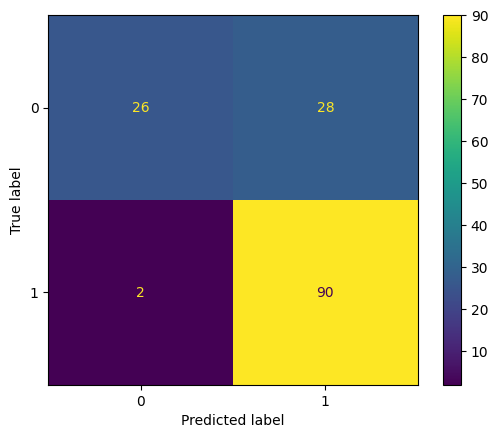

In [44]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_pred = y_pred, y_true=y_test), display_labels=model.classes_)
disp.plot()
plt.show()